$\newcommand\E{{\mathbf E}}$
$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$
$\newcommand{\ind}{\inde}$
$\newcommand\P{{\mathbf P}}$

# Un test d'équirépartition

In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

## Etude par simulation

On commence par construire un test d'équirpartition d'une suite de
$100$ tirages à pile ou face.

On simule des tirages à pile ou face
répétés. A partir de ce tirage on calcule le nombre de pile
consécutifs maximum dans le vecteur.

In [4]:
def tirage_pf(n,p):
    # Effectue n tirage a Pile (P) ou face (F) (1/2,1/2)
    X=""
    for i in range(n):
        U=random.random()
        # on rajoute un pile ou un face avec proba (1/2,1/2)
        
        ######  A vous de jouer  .....
    return X

def max_length(U):
# Calcule le nombre maximum de P consecutifs
# dans la suite U
    MAX=0;N=0;
    for n in range(len(U)):
        # nombre maximum de P consecutifs
        
        ######  A vous de jouer  .....
        
    return MAX

### Question 1

 Faire $1000$ tirages du nombre maximum de $P$ et en tracer un
  histogramme.  On calcule par simulation une approximation de la loi
  du nombre maximum de piles consecutifs (un histogramme d'un grand
  nombre de tirages i.i.d.).

In [5]:
def main_1():
    p=1.0/2.0
    # On teste cette fonction avec N=20
    U=tirage_pf(20,p)# 20 tirages a pile ou face 1/2,1/2
    max_length(U)# nombre maximum de P consecutifs

    # On effectue 1000 tirages avec N=100
    N=100
    Taille=100000 # nbre de simulation
    X=np.zeros(Taille)
    for i in range(Taille):
        # on réalise en échantillon selon la loi 
        # du nombre maximum de P consecutifs
        
        ######  A vous de jouer  .....
 
    # On fabrique l'histogramme 
    histo=np.zeros(21);
    for i in range(21):
        histo[i]=np.size(np.where(X==i))/(1.0*Taille)
    # On trace cet histogramme
    plt.bar(range(21), histo[0:21])
    plt.xlabel('Loi de la longueur maximale pour 10 000 simulation de longueur 100')

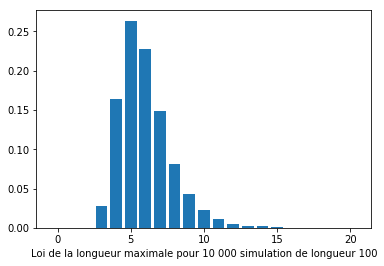

In [6]:
main_1()

### Question 2

 Montrer que le nombre de piles successifs jusqu'à l'instant courant
  est une chaîne de Markov à valeurs dans ${\mathbf N}$ de matrice de
  transition $P(x,x+1)=1/2$, $P(x,0)=1/2$. Simuler et tracer de
  trajectoires de cette chaîne.

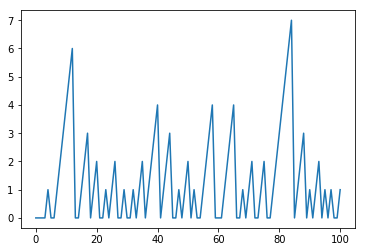

In [7]:
def trajectoire(U):
# On calcule la trajectoire de X
# à partir d'un tirage U
    X=np.zeros(len(U)+1)
    val=0;
    for n in range(len(U)):
        # on rajoute un si on voit un pile
        # on revient en zéro sinon
        
        ######  A vous de jouer  .....
    return X;

def main_2():
    N=100
    p=1.0/2.0 

    # On trace une trajectoire
    U=tirage_pf(N,p)
    X=trajectoire(U)
    plt.plot(X)
    
    # puis Nbre trajectoires de X
    Nbre=0
    for i in range(Nbre):
        U=tirage_pf(N,p)
        X=trajectoire(U)
        plt.plot(X);
    
main_2()

# Calcul exact de la probabilité

On va calculer exactement la probabilité de voir au moins $l$
piles consécutifs.

### Question 3

 Calculer la matrice de transition de la chaîne arrêté en $l$,
  l'implementer en __Python__. En déduire la probabilité d'avoir au
  moins $l$ pile consécutifs pour $l=0,\ldots,20$. 

In [8]:
def proba(N,l,p):
    # Calcule la probabilite de voir au moins l piles consecutifs
    # dans N tirages a pile (p) ou face (1-p)

    # la matrice de transition de la chaîne arrêtée en l
    # est de taille (l+1,l+1)
    P=np.zeros((l+1,l+1)) # les indices varient de 0 à l.
    #P[0:l,0]= ... # attention 0:l = 0,1,...,l-1
    #P[0:l,1:l+1]= ... # attention 1:l+1 = 1,...,l
    #P[l,l]= ...
    ######  A vous de jouer  .....
    
    # Sa puissance N ième
    PN=np.linalg.matrix_power(P,N)
    return PN[0,l]

In [9]:
l=5
p=1/2
proba(100,l,p)

0.810109599196358

### Question 4

Calculer la loi du nombre maximum de piles consécutifs.

In [10]:
def calculer_loi(N,p):
    MAXMAX=50;# a choisir assez grand (mais pas trop ...)
    loi=np.zeros(MAXMAX+1)
  
    previous=1;# proba d'avoir au moins 0 pile = 1 !
    # le support de la loi est [0,1,...,N] que l'on tronque en MAXMAX
    for l in range(min(N,MAXMAX)+1):
        # On doit calculer proba(N,l+1,p) - proba(N,l,p)
        
        ######  A vous de jouer  .....
    return loi

Comparer avec les simulations précédentes. Vérifier que
  $\P(X=3)$ est du même ordre que $\P(X=10)$.

In [11]:
def main_3():
    # On teste avec N=1 et N=2, p=1/2
    # Pour N=1, 0 pile avec proba 1/2 et 1 pile avec proba 1/2
    calculer_loi(1,1/2.0)
    # Pour N=2, on doit trouver (1/4,1/2,1/4) pour (0,1,2)
    calculer_loi(2,1/2.0)
    # en principe ca marche ...
  
    N=100;p=1.0/2.0
    loi=calculer_loi(N,p)
    print('=1?',sum(loi)) # on verifie que ca somme a 1
  
    # dessin
    plt.bar(range(21), loi[0:21])
    
    print("proba d'avoir 3 (ou moins) piles consécutifs: ",np.sum(loi[0:4]))
    print("proba d'avoir 10 (ou plus) piles consécutifs: ",np.sum(loi[10:20]))   
    
    # comparaison avec les simulations
    Taille=10000;
    X=np.zeros(Taille);
    # On fait 10000 tirages
    for i in range(Taille):
        U=tirage_pf(N,p)
        X[i]=max_length(U)
  
    # on calcule l'histogramme empirique
    histo=np.zeros(21)
    for i in range(21):
        histo[i]=np.size(np.where(X==i))/(1.0*Taille)
        
    # on regarde si l'histogramme empirique de la question 1 est proche du calcul exact
    epsilon=np.linalg.norm(loi[0:20]-histo[0:20])
    # epsilon doit etre "petit", pour bien faire il faudrait faire un
    # test du |$\xi^2$| pour savoir ce que "petit" veut dire ici.
    print("epsilon = ",epsilon," --- petit en principe.")

=1? 0.9999999999999887
proba d'avoir 3 (ou moins) piles consécutifs:  0.027284957701160018
proba d'avoir 10 (ou plus) piles consécutifs:  0.044098128423184044
epsilon =  0.007726224443254494  --- petit en principe.


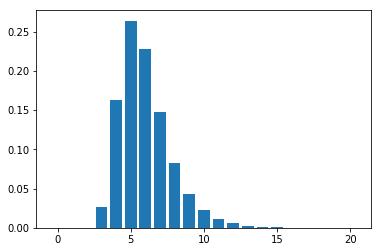

In [12]:
main_3()

# Test du critère

### Question 5

Vérifier que, pour des tirages aléatoires, le test proposé ("obtenir un run
plus grand que $4$") fonctionne dans la plupart des cas (dans $97\%$ des cas!),
mais pas toujours.

In [19]:
def main_4():
# Test du critère lorsque les tirages sont aléatoires
# Ca marche "souvent" mais pas "toujours".
    N=100
    p=1/2.0
    Taille=100
    for i in range(Taille):  
        U=tirage_pf(N,p);
        if (max_length(U) >= 4) :
            print("*",end='')
        else:
            # Ca arrive "rarement" mais ca arrive 3 fois sur 100 quand même
            print("!",end='')


In [21]:
main_4()

***************!***************************************************************************!********

Par quelle loi peut on approximer la loi du nombre ce cas où le test ne fonctionne pas ?

# Comment la loi varie t'elle en fonction de $N$ ?

On regarde ce qui se passe lorsque $N$ devient grand.

### Question 6

On va faire varier $N$ pour étudier (en fonction de $N$) la valeur $k$
qui réalise le maximum de la probabilité d'apparition d'exactement
$k$ piles consécutifs: on cherche le "maximum de vraisemblance" de la loi du "run
  maximum".
  
On commencera par calculer la valeur réalisant le maximum et ce maximum
pour $N=100$, $N=500$, $N=1000$.

In [15]:
def main_5():
# Calcul du maximum de vraisemblance de la loi 
# imax = indice du maximum,  m = le maximum
    p=1.0/2.0;
    print('N: [indice du maximum de vraisemblance] -> [valeur du maximum]\n')
    for N in [10,100,1000]:
        loi=calculer_loi(N,p)
        # Il faut calculer l'indice du maximum de vraisemblance de la loi 
        
        ######  A vous de jouer  .....
        
        
        print (N,": ",k,' -> ',m)


In [16]:
main_5()

N: [indice du maximum de vraisemblance] -> [valeur du maximum]

10 :  2  ->  0.3515625
100 :  5  ->  0.26401597994641235
1000 :  9  ->  0.23879124004379726


### Question 7

 Vérifier que la moyenne du ''run maximum'' varie presque linéairement en
fonction de $\log(N)$.

In [36]:
def moyenne(loi):
    return sum(range(np.size(loi)) * loi)
#-------------------------------------------------------
def main_5_bis():
# La moyenne varie (approximativement) comme C log(N).
# Ca peut se prouver.
    p=1.0/2.0
    valeurs=[10,50,100,500,1000,5000,10000]
    x=np.zeros(np.size(valeurs))
    y=np.zeros(np.size(valeurs))
    i=0
    for N in valeurs:
        loi=calculer_loi(N,p)
        # On veut tracer la courbe moyenne -> log(n)
        
        ######  A vous de jouer  .....
        
        
        i=i+1
    plt.plot(x,y)

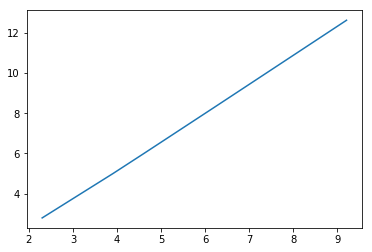

In [37]:
main_5_bis()

Ca ressemble beaucoup à une droite mais ça n'en n'est pas une !

# Calcul du prix d'une option européenne dans le modèle de Cox-Ross

## Simulation du modèle

On considère le chaîne de Cox-Ross~:
$$
X_0=x_0, X_{n+1}= X_{n} \left(u\times\inde{U_{n+1}=P}+d\times\inde{U_{n+1}=F}\right).
$$
avec $N=10$, $x_0=100$, $p=1/2$, $u=1+1/N$, $d=1-1/N$.

On cherche à calculer $\E(f(X_N))$ où $f(x)=\max(x-K,0)$ avec $K=100$.

### Question 8

Simuler cette chaîne de Markov.

In [38]:
def simul_cox_ross(N,x_0,p,u,d):
    U=np.random.binomial(1,p,N) # tirages a pile ou face (p,1-p)
    X=np.zeros(np.size(U))
    X[0]=x_0;
    for i in range(np.size(U)-1):
        # simulation d'un étape pour le processus de Cox-Ross
        
        ######  A vous de jouer  .....
    return X

In [39]:
def main_6():
    N=50
    sigma=0.3
    p=1.0/2.0;u=1.0-sigma/math.sqrt(N);d=1.0+sigma/math.sqrt(N)
    x_0=100

    X=simul_cox_ross(N,x_0,p,u,d)
    plt.plot(X)

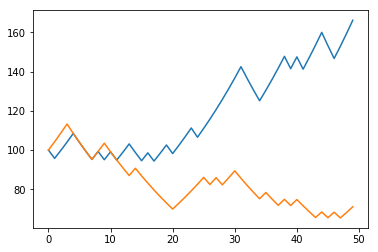

In [40]:
main_6()
main_6()

##  Une version récursive de l'algorithme de calcul de prix

### Question 9

Ecrire une version récursive de l'algorithme de calcul de prix. On recopie l'équation obtenue dans le cours.

Tester l'algrithme pour $N$ petit ($N \leq 10$). Vérifier que pour $N\geq 20$ on risque d'attendre longtemps
le résultat !

In [41]:
K=100;
def f(x):
# le payoff
    return max(x-K,0);
#-------------------------------------------------------
def prix_recursif(x,k,N,p,u,d):
    if (k==N):
        # on retourne le payoff
        return f(x)
    else:
        # on applique l'équation de programmation dynamique ...
        
        ######  A vous de jouer  .....
#-------------------------------------------------------
def prix_slow(x,N,p,u,d):
    return prix_recursif(x,0,N,p,u,d)

In [42]:
N=10;
# On choisit des paramètres pour converger 
# vers le modèle de Black et Scholes.
sigma=0.3;
p=1.0/2.0;d=1.0-sigma/math.sqrt(N);u=1.0+sigma/math.sqrt(N)
x_0=100
prix_slow(x_0,N,p,u,d)  # Recommencer avec N=20 pour savoir ce que slow veut dire !

12.078135725435745

## Une version itérative de l'algorithme de calcul de prix

### Question 10

 Ecrire une version efficace (itérative) de l'algorithme de calcul de prix. 

In [43]:
def prix(x_0,N,p,u,d):
    U=np.zeros([N+1,N+1])
    for k in range(N+1):
        U[N,k] = f(x_0 * pow(u,k) * pow(d,N-k))
    for n in range(N-1,-1,-1): # le temps decroit de N-1 a 0
        for k in range(0,n+1): # [0:n]
            # progrmmation dynamique version éfficace
        
            ######  A vous de jouer  .....
    return U[0,0]

 Comparer le résultat des deux versions de l'algorithme.

In [44]:
def main_7():
    N=10
    sigma=0.3
    p=1.0/2.0
    d=1.0-sigma/math.sqrt(N)
    u=1.0+sigma/math.sqrt(N)
    K=100.0;x_0=100.0

    print(prix(x_0,N,p,u,d))

    # Les deux algos font ils le même chose ?
    # on verifie : prix_slow(x_0,N) \approx prix(x_0,N)
    print ("Différence entre les 2 résultats: ", abs(prix_slow(x_0,N,p,u,d) - prix(x_0,N,p,u,d)),"\n")

main_7()

12.078135725435752
Différence entre les 2 résultats:  7.105427357601002e-15 



Tracer la fonction $x\to u(0,x)$ pour $x\in [80,120]$.

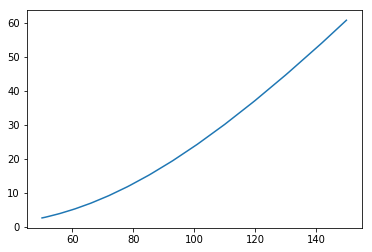

In [45]:
sigma=0.6
N=200
d=1-sigma/math.sqrt(N)
u=1+sigma/math.sqrt(N)
p=1.0/2.0;

largeur=100
vmin=50
courbe=np.zeros(largeur+1)
x_values=np.arange(vmin,vmin+largeur+1)

n=-1;
for x in x_values:
    n=n+1
    # tracer de la courbe x -> prix(x)
        
    ######  A vous de jouer  .....
plt.plot(x_values,courbe)


### Question 10

Que constatez vous lorsque $N$ augmente ($N=10,100,200,500$) et
  que l'on choisit $u$ et $d$ en fonction de $N$ de la façon suivante:
$$
   u=1+\frac{\sigma}{\sqrt{N}}\; \mbox{ et }\; d=1-\frac{\sigma}{\sqrt{N}}.
$$

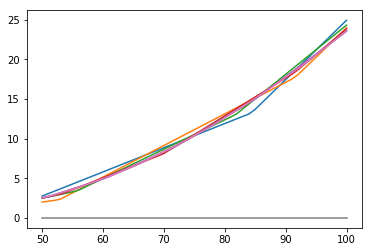

In [46]:
def main_8():
# Avec cet algorithme on peut augmenter N
# mais il faut renormaliser convenablement u et d pour
# rester borné.
# Essayer avec N=10,100,200,...,1000
    sigma=0.6
    largeur=50
    vmin=50
    courbe=np.zeros(largeur+1)
    x_values=np.arange(vmin,vmin+largeur+1)
    for N in [3,5,10,20,50,100,200]:
        d=1-sigma/math.sqrt(N)
        u=1+sigma/math.sqrt(N)
        p=1.0/2.0
 
        n=-1;
        for x in x_values:
            n=n+1;
            courbe[n]=prix(x,N,p,u,d)
        plt.plot(x_values,courbe)
    
    n=-1;
    for x in x_values:
        n=n+1
        courbe[n]=max(x-K,0)
    plt.plot(x_values,courbe)
    # Ca converge, mais vers quoi ? Vous verrez ça en 2A.
    
main_8()


# Un cas plus délicat: les options sur moyenne

On cherche maintenant à évaluer $\E(f(S_N))$ où $S_n=X_1+\cdots+X_n$.

 Pourquoi le processus $(S_n,n\geq 0)$ n'est il pas une chaîne de
  Markov ? Vérifier que le couple $((X_n,S_n),n\geq 0)$ est une chaine
  de Markov de matrice de transition ($0$ sinon)
  $$
  P((x,s), (xu,s+xu))=p,\quad P((x,s), (xd,s+xd))=1-p.
  $$
  issue de $(x_0,0)$ à l'instant $0$.  En déduire que
  $\E(f(S_N))=u(0,x_0,0)$ où $u$ est la solution unique de
  \begin{equation}\label{eq:rec}
    \left\{
      \begin{array}{l}
        u(n,x) = p u(n+1,xu,s+xu) + (1-p) u(n+1,xd,s+xd),\quad n< N\\
        u(N,x,s) = f(s),
      \end{array}
    \right.   
  \end{equation}
        
Ecrire un algorithme récursif (lent) qui résoud l'équation précédente ($N\leq 10$!) et permet
de calculer $\E(f(S_N))$.      

In [47]:
def f_moy(x,s,N):
    return max((s/N)-K,0)

def prix_moyenne(x,s,k,N,p,u,d):
    if (k==N):
        return f_moy(x,s,N)
    else:
        # écrire l'équation de programmation dynamique pour ce problème
        
        ######  A vous de jouer  .....
        

def prix_slow_moyenne(x,N,p,u,d):
    return prix_moyenne(x,x,0,N,p,u,d)

In [48]:
def main_9():
    N=10
    sigma=0.3
    p=1.0/2.0
    d=1.0-sigma/math.sqrt(N)
    u=1.0+sigma/math.sqrt(N)
    x_0=100.0;K=100.0

    # Ca marche mais ce n'est pas très efficace ...
    print('Prix option sur moyenne: ',prix_slow_moyenne(x_0,N,p,u,d),'\n')

main_9()

Prix option sur moyenne:  13.18627110107544 



In [49]:
def liste_moyenne_rec(x,s,k,N):
# On constitue la liste des points visités par la chaine
# à l'instant N, en partant de (x,s) à l'instant k.
# Si un point est visité deux fois, il y figure 2 fois.
    if (k==N):
        liste=[]
        liste.append([x,s])
        return liste
    else:
        liste_up = liste_moyenne_rec(x*u,s+x*u,k+1,N)
        liste_down = liste_moyenne_rec(x*d,s+x*d,k+1,N)
        liste_up.extend(liste_down)
        return liste_up
    
def liste_moyenne(x,N):
    # On part de (x,s=x) a l'instant 0
    return liste_moyenne_rec(x,x,0,N)

def main_10():
    x_0=100
    N=10
    liste=liste_moyenne(x_0,N)

    # Tri des points selon les valeurs de la somme.
    # Les valeurs de x peuvent etre egales, mais pas celle de s.
    # Nous allons le verifier.
    liste.sort();

    # On regarde si tous les points sont differents
    # en parcourrant le tableau ainsi classé
    epsilon=0.00001
    Taille=len(liste)
    match=[]
    for i in range(Taille-1):
        if (np.linalg.norm(np.asarray(liste[i]) - np.asarray(liste[i+1])) < epsilon):
            print ('Warning: (', liste[i][0],',',liste[i][1], ') ~ (',liste[i+1][0],',',liste[i+1][1],')\n')
            match.append([liste[i][0],liste[i][1],liste[i+1][0],liste[i+1][1]])
                              
    if len(match) == 0: 
        print ("Aucun point n'est dupliqué.\n")
        
main_10()

Aucun point n'est dupliqué.

